In [1]:
from skimage import io, morphology, color
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

data = "data/fft/"

In [2]:
img  = io.imread(data + '2.tif')
img_gray = color.rgb2gray(img)

img_gray *= 255
img_gray.astype(np.uint8)

C:\Users\niels\.conda\envs\echelon\lib\site-packages\skimage\external\tifffile\tifffile.py:2618: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


array([[13, 12, 20, ..., 39, 42, 29],
       [32, 18, 28, ..., 36, 25, 28],
       [28, 23, 16, ..., 38, 27, 21],
       ...,
       [13, 12, 26, ...,  0,  1, 12],
       [43, 11, 30, ..., 15,  8,  9],
       [29, 18, 36, ..., 21,  0, 13]], dtype=uint8)

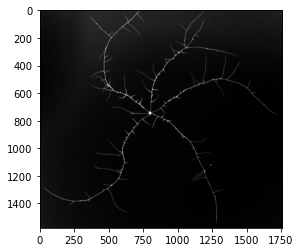

In [3]:
plt.imshow(img)

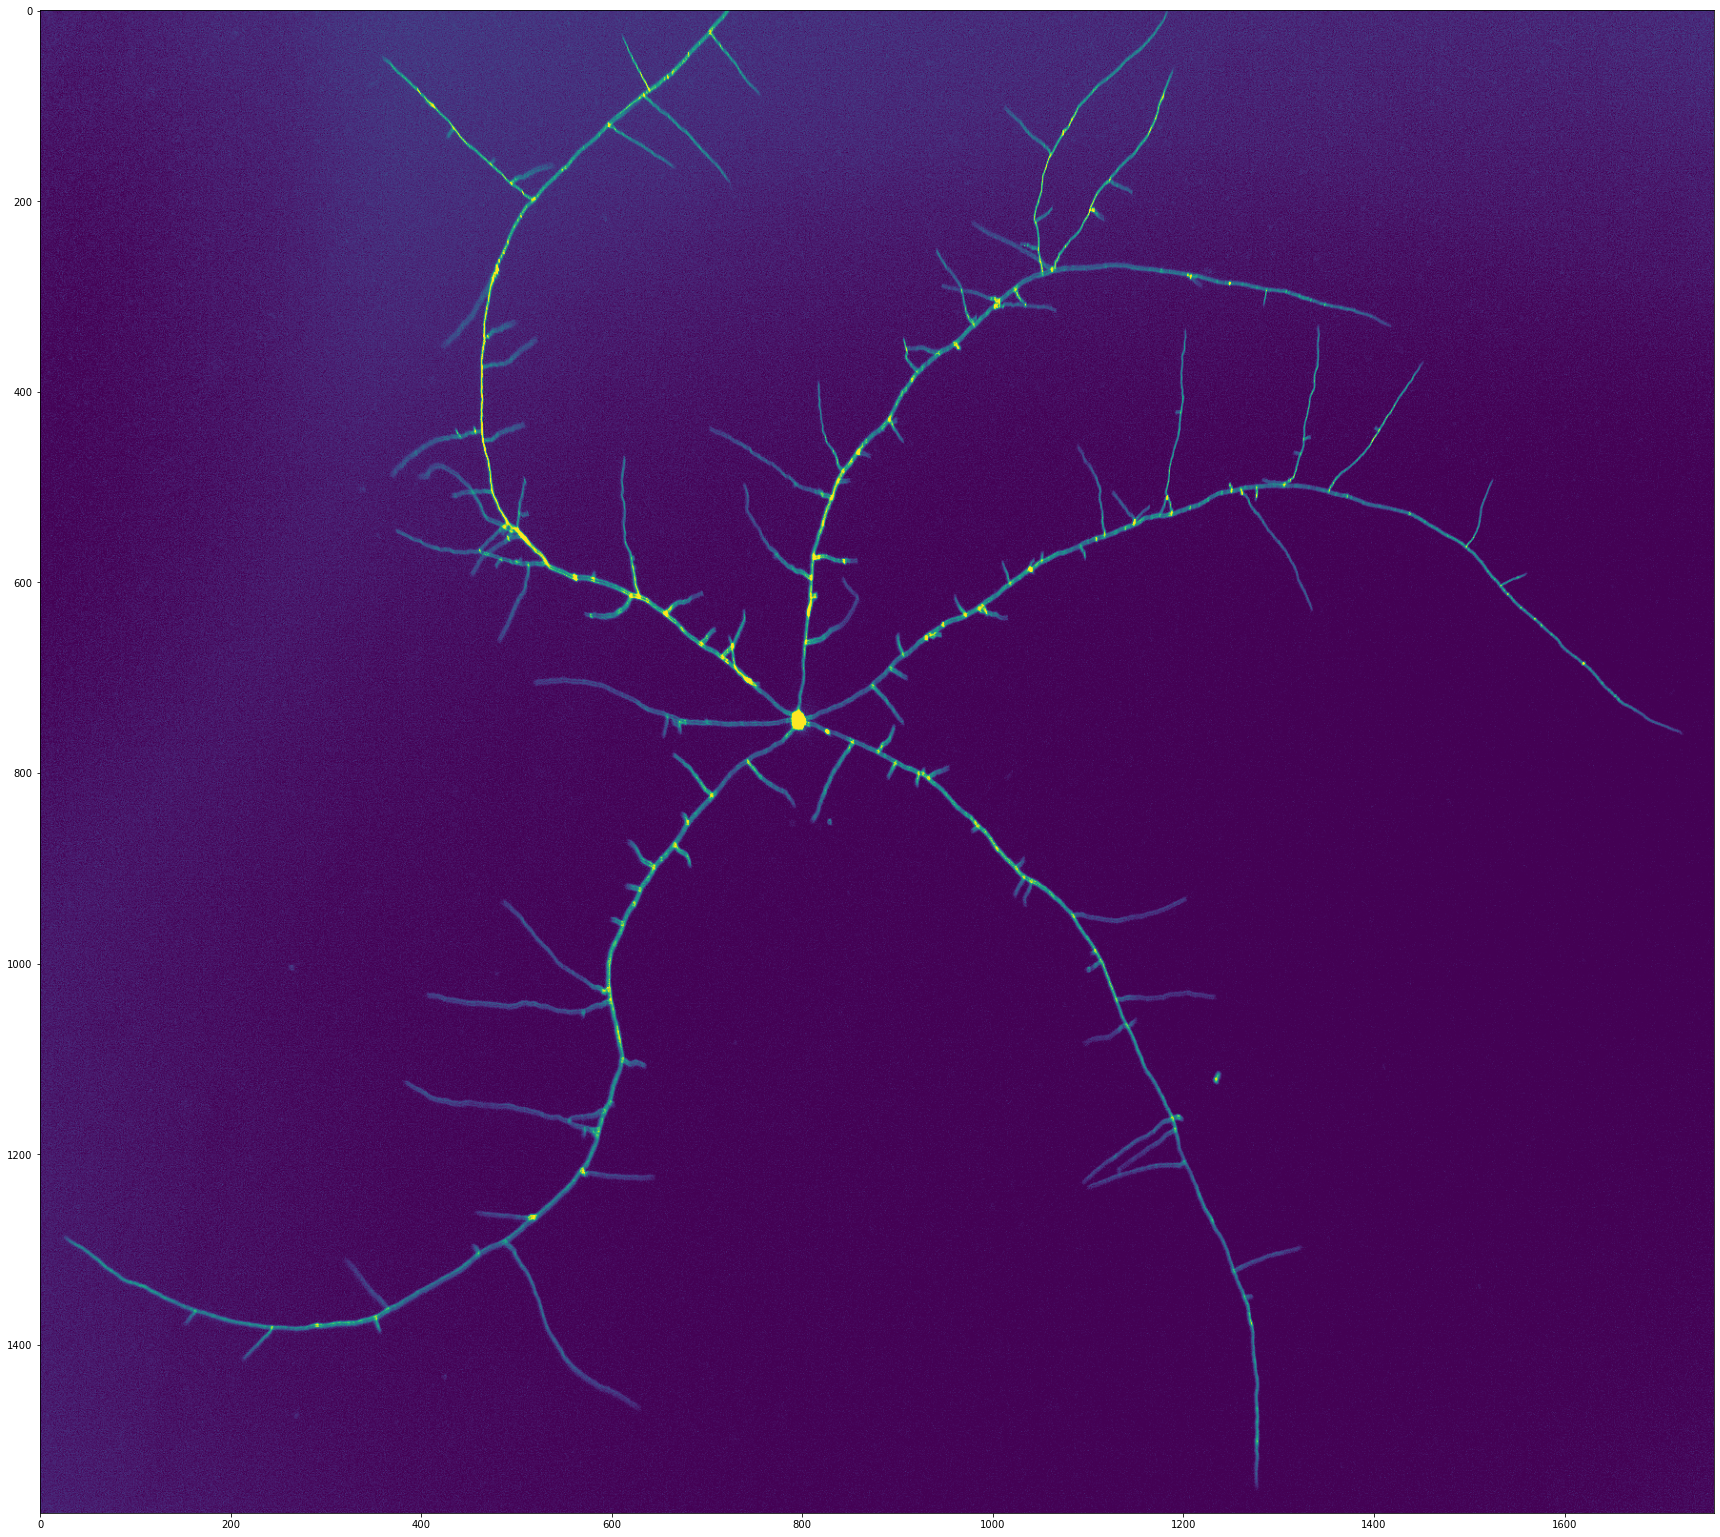

In [4]:
plt.figure(figsize=[30,30])
plt.imshow(img_gray)

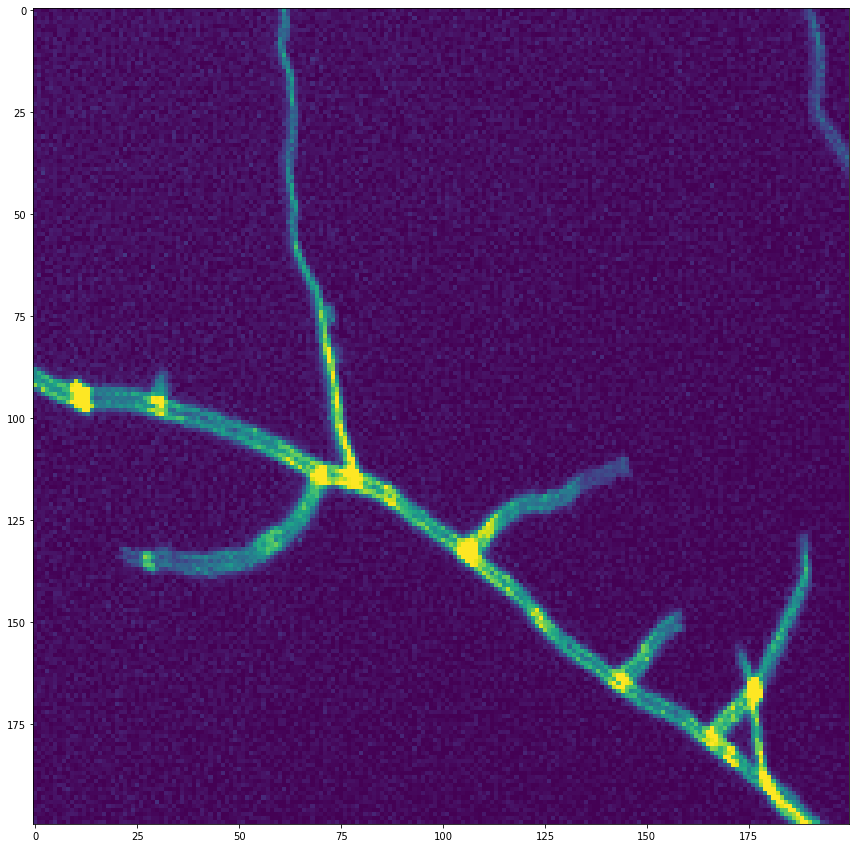

In [7]:
plt.figure(figsize=[15,15])
plt.imshow(img_gray[500:700, 550:750])

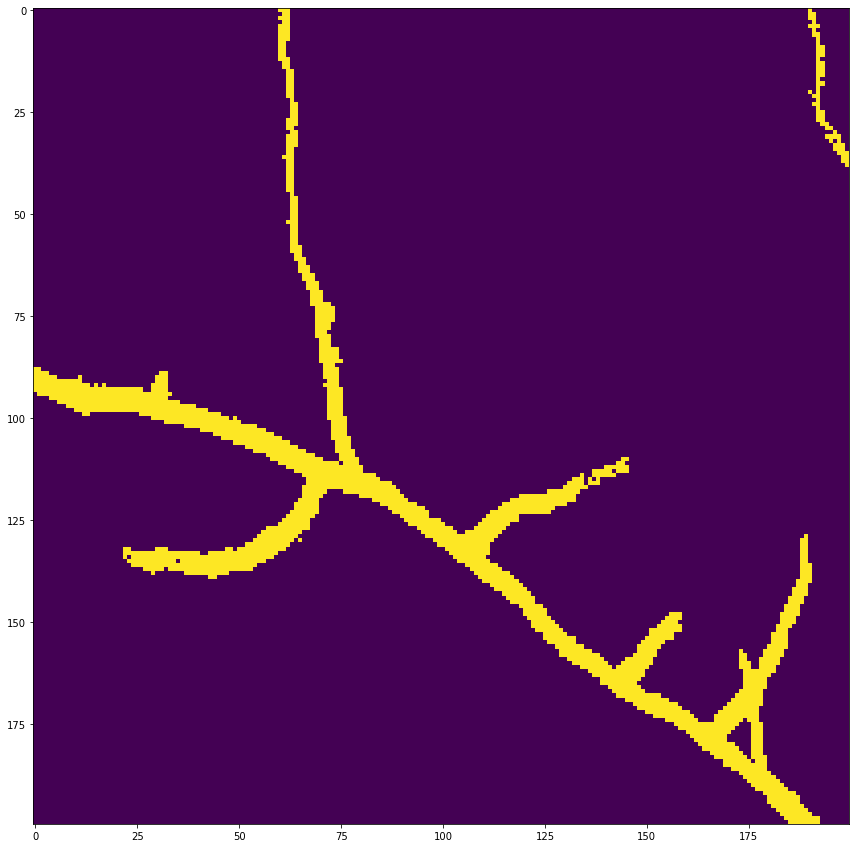

In [9]:
img_binarized = img_gray.copy()
img_binarized[img_binarized >= 50] = 255
img_binarized[img_binarized < 50] = 0

plt.figure(figsize=[15,15])
plt.imshow(img_binarized[500:700, 550:750])

img_binarized = Image.fromarray(img_binarized).convert("1")
#img_binarized

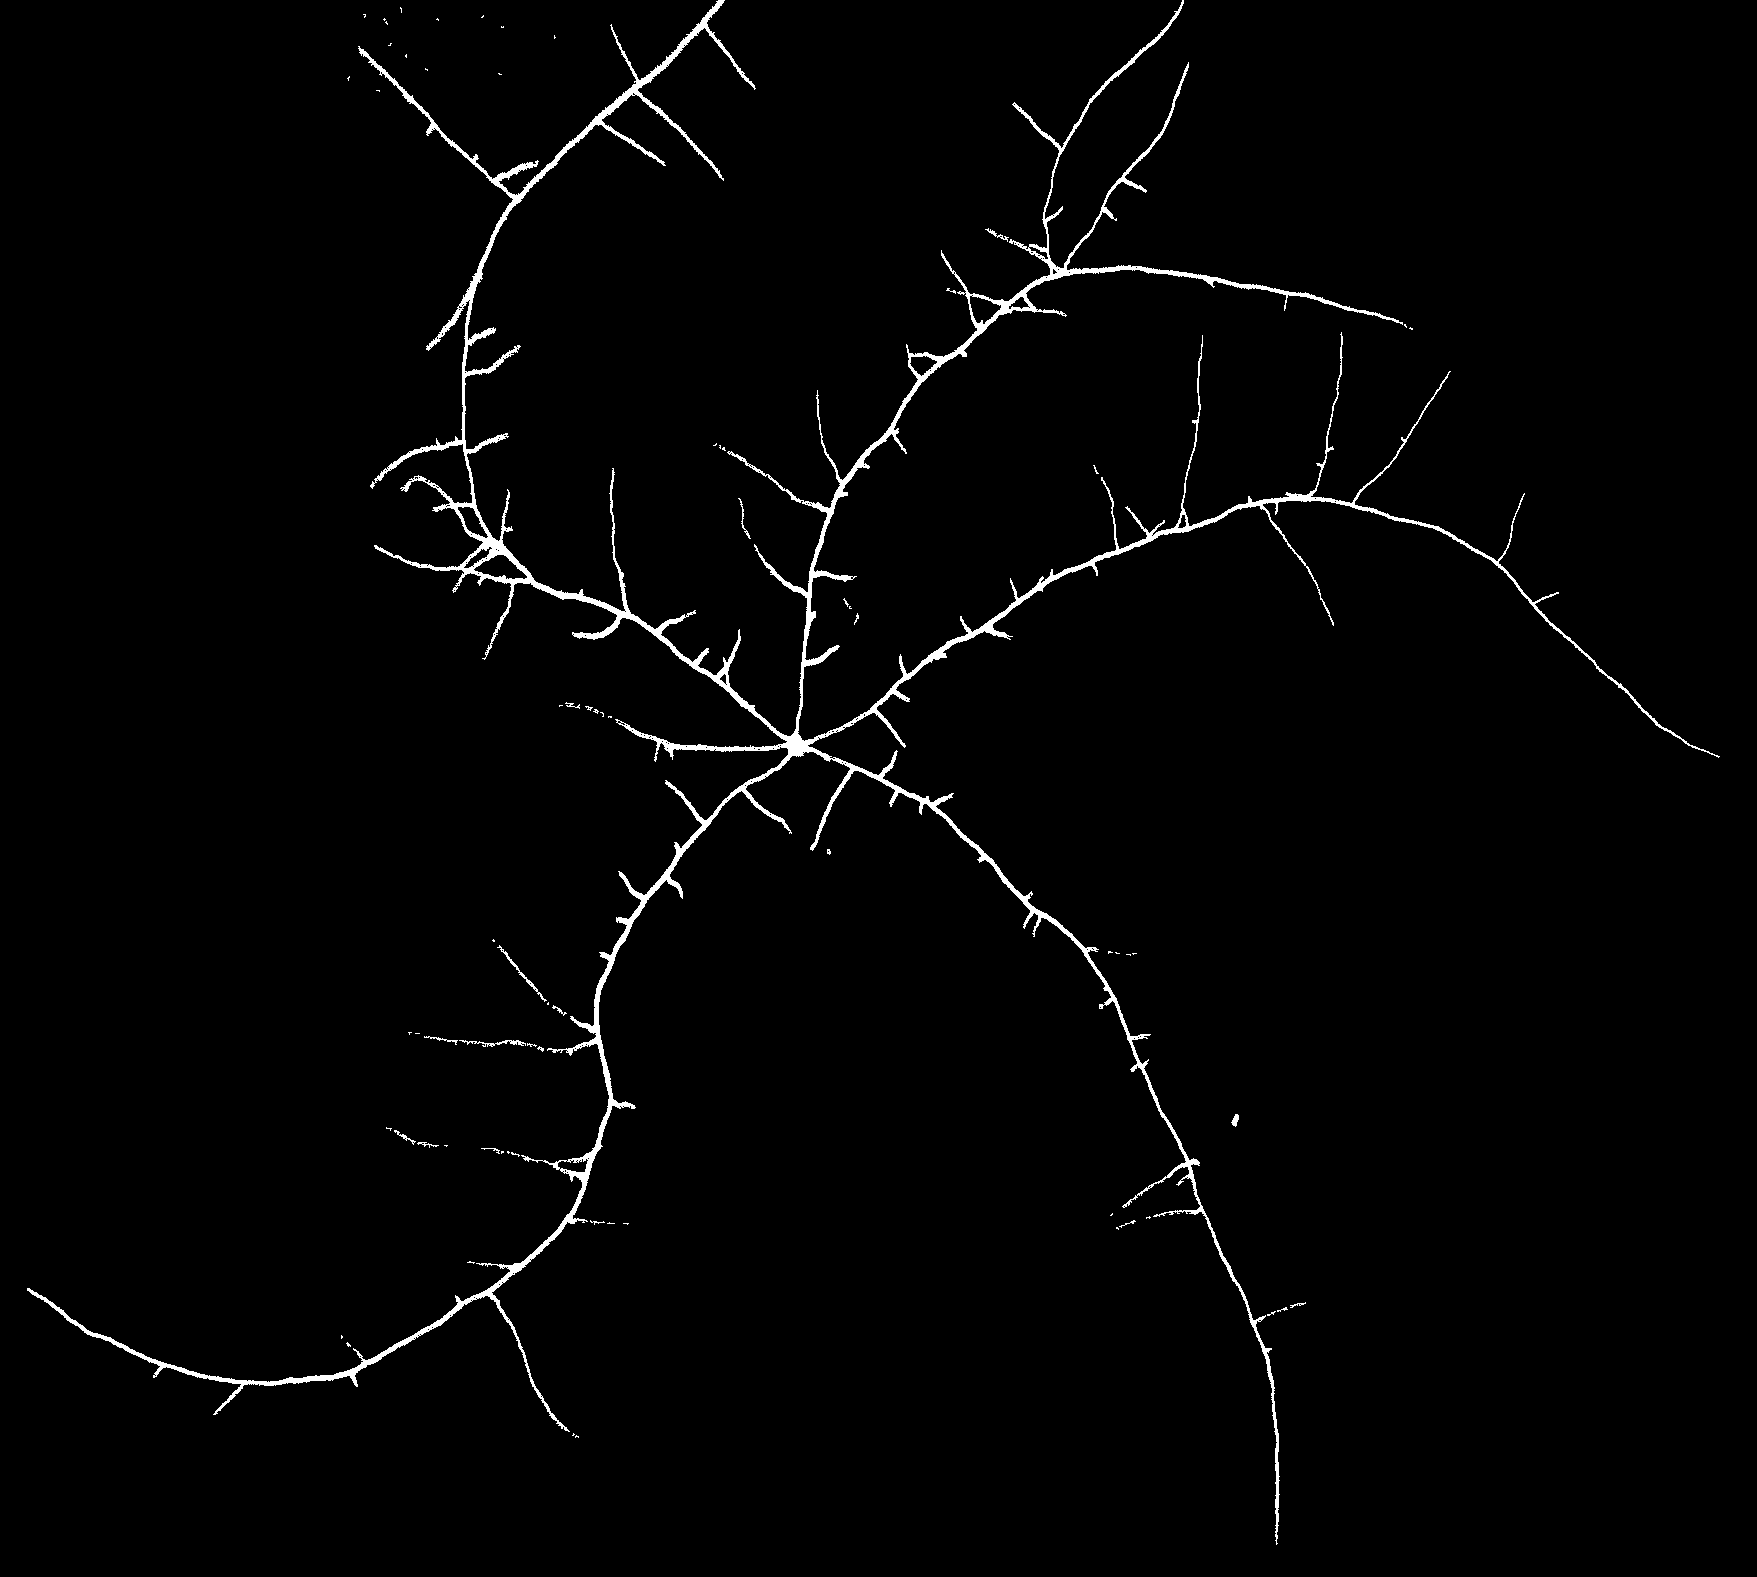

In [11]:
clean_binary_img = morphology.remove_small_objects(np.array(img_binarized), min_size=5)

img_open = Image.fromarray(clean_binary_img).convert("1")
img_open

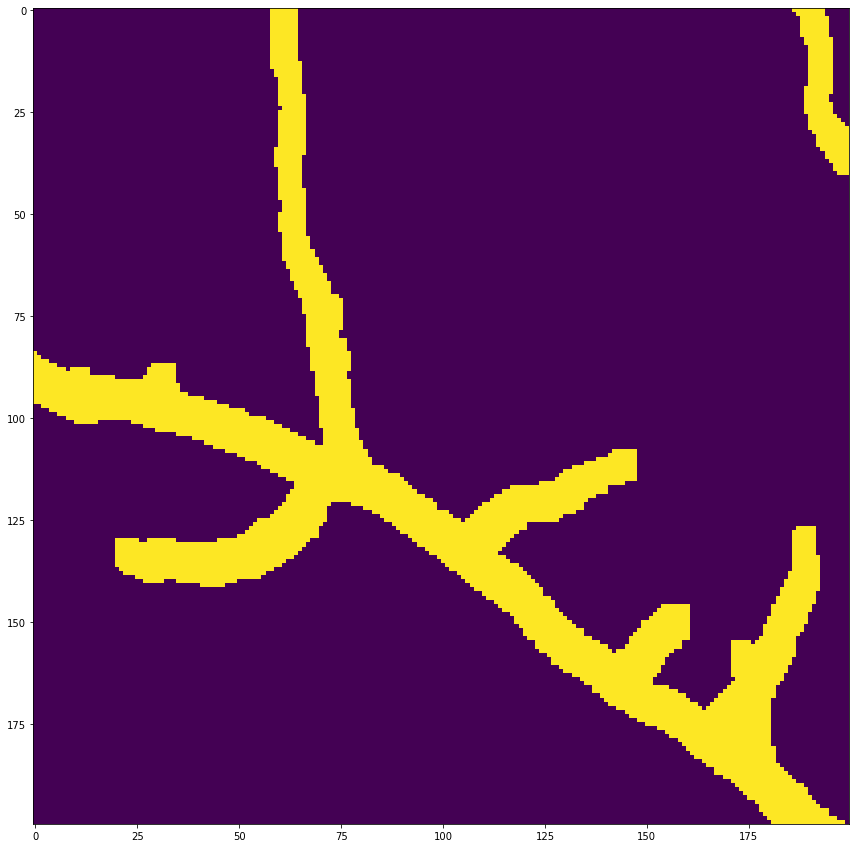

In [13]:
dilated_binary_img = morphology.binary_dilation(np.array(clean_binary_img), selem=morphology.square(5))

plt.figure(figsize=[15,15])
plt.imshow(dilated_binary_img[500:700, 550:750])

img_open = Image.fromarray(dilated_binary_img).convert("1")
#img_open

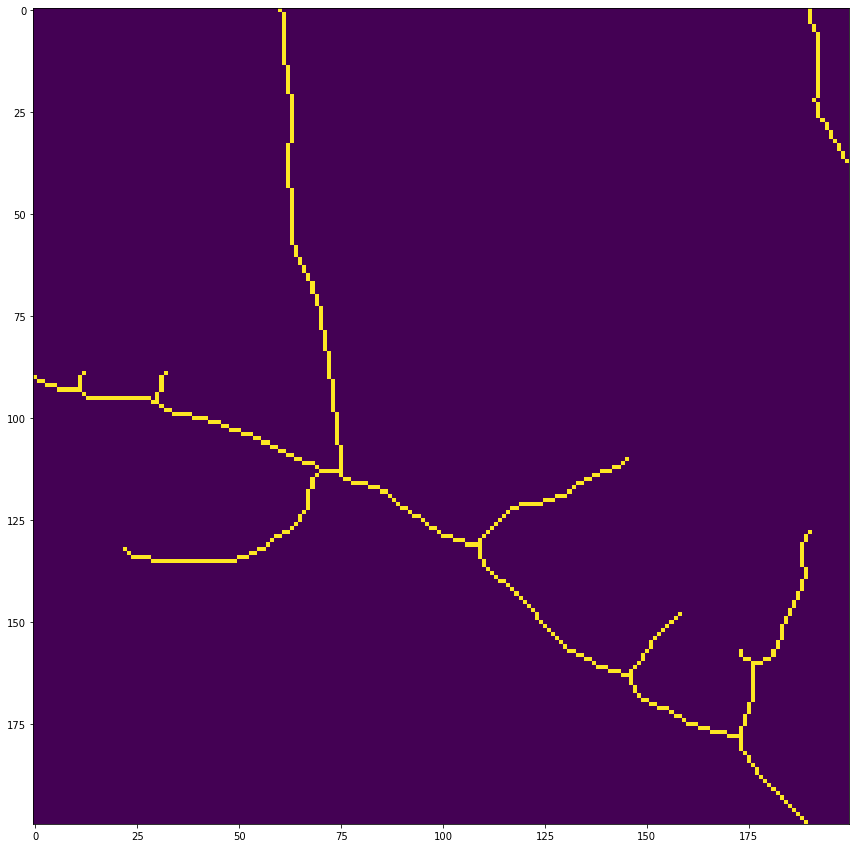

In [15]:
skeleton = morphology.skeletonize(dilated_binary_img)

plt.figure(figsize=[15,15])
plt.imshow(skeleton[500:700, 550:750])

img_open = Image.fromarray(skeleton).convert("1")
#img_open

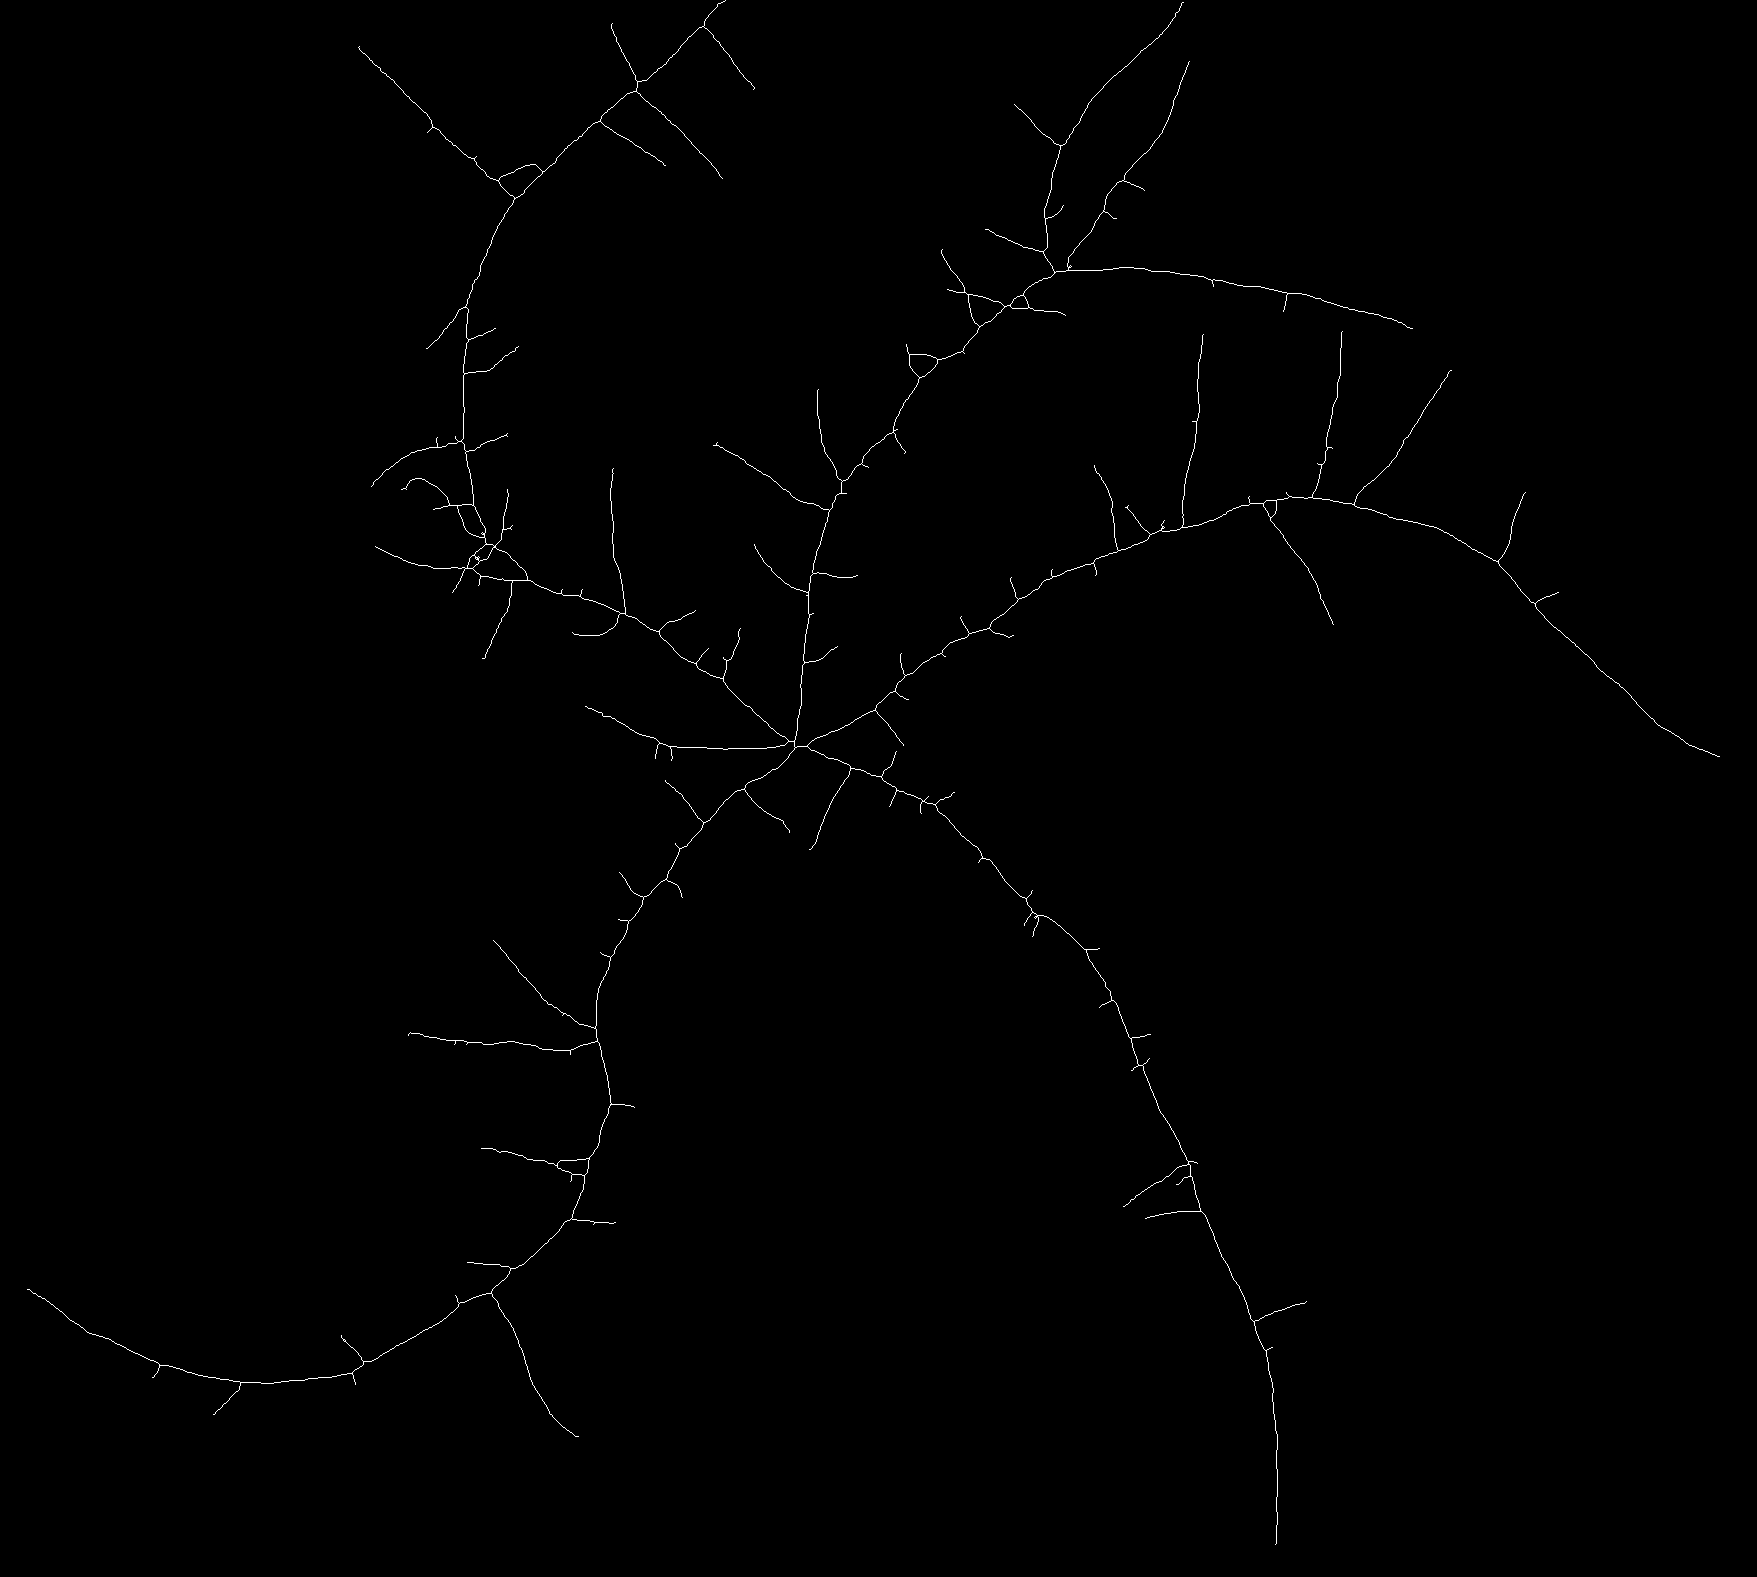

In [10]:
clean_skeleton = morphology.remove_small_objects(np.array(skeleton), min_size=100, connectivity=2)

img_open = Image.fromarray(clean_skeleton).convert("1")
img_open

In [ ]:
branches = 

In [ ]:
# Find branches
# Find endpoints
# For each branch endpoint pair, check if they connect, with no other checkpoint in middle of path
